In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import lightgbm as lgb
#import xgboost as xgb
import pickle
import sys
sys.path.append('..')

In [2]:
notebook_name = os.path.basename(os.getcwd())
timestamp="07"

In [3]:
path_movie_dir = '../data/movie/fps30_mask/'
path_save_dir = os.path.join('../data/05_Train_ver2.0/', timestamp)
if not os.path.exists(path_save_dir):
    os.makedirs(path_save_dir)
path_train_file = os.path.join(path_save_dir, 'train.csv')
path_model_file = os.path.join(path_save_dir, 'model.pkl')

In [4]:
path_label_name_file = '../data/labels/labels_num.csv'
path_action_dir = os.path.join('../data/01_DataProcessing/', timestamp)
path_point_dir = os.path.join('../data/02_GetPoints_ver2.0/', timestamp)
path_split_dir = os.path.join('../data/04_Split_ver2.0/', timestamp)

path_train_file_dir = os.path.join(path_split_dir, 'train')
path_test_file_dir = os.path.join(path_split_dir, 'test')
# path_model_dir = '../data/05_train/'

In [5]:
file_names = ['fall','sitdown', 'standup']
# file_names = ['forehand']
movie_names = [file_name + '.MOV' for file_name in file_names]
points_file_names = [file_name + '.csv' for file_name in file_names]

In [6]:
objective = 'action_gt_num'

In [7]:
features = ['RShoulder','RHip','RKnee','Neck','Nose',
           'LShoulde','LHip','LKnee']

In [8]:
target_columns = []
for feature in features:
    target_columns.append(feature + '_x')
    target_columns.append(feature + '_y')
target_columns

['RShoulder_x',
 'RShoulder_y',
 'RHip_x',
 'RHip_y',
 'RKnee_x',
 'RKnee_y',
 'Neck_x',
 'Neck_y',
 'Nose_x',
 'Nose_y',
 'LShoulde_x',
 'LShoulde_y',
 'LHip_x',
 'LHip_y',
 'LKnee_x',
 'LKnee_y']

In [9]:

num = 0
path_file = os.path.join(path_train_file_dir, points_file_names[num])
data_df = pd.read_csv(path_file, index_col='frame_num')
# data_df = pd.read_csv(path_file, index_col='frame_num')

In [10]:
frame_length = 15
X = data_df.drop(columns=[objective])
X

,Unnamed: 0,Nose_x,Nose_y,Neck_x,Neck_y,RShoulder_x,RShoulder_y,RElbow_x,RElbow_y,RWrist_x,...,LAnkle_x,LAnkle_y,REye_x,REye_y,LEye_x,LEye_y,REar_x,REar_y,LEar_x,LEar_y
frame_num,,,,,,,,,,,,,,,,,,,,,
0,0,0.400000,0.028986,0.511111,0.173913,0.200000,0.188406,0.088889,0.376812,0.000000,...,0.888889,0.985507,0.355556,0.000000,0.466667,0.000000,0.266667,0.028986,0.600000,0.028986
1,1,0.369565,0.028986,0.478261,0.173913,0.195652,0.188406,0.086957,0.376812,0.000000,...,0.869565,1.000000,0.326087,0.014493,0.434783,0.000000,0.260870,0.028986,0.565217,0.028986
2,2,0.369565,0.028986,0.456522,0.173913,0.173913,0.202899,0.065217,0.391304,0.000000,...,0.913043,1.000000,0.326087,0.014493,0.434783,0.000000,0.239130,0.028986,0.565217,0.028986
3,3,0.369565,0.014706,0.456522,0.147059,0.152174,0.176471,0.065217,0.382353,0.000000,...,0.913043,1.000000,0.326087,0.000000,0.434783,0.000000,0.239130,0.014706,0.543478,0.014706
4,4,0.355556,0.014925,0.444444,0.149254,0.155556,0.179104,0.066667,0.373134,0.000000,...,0.933333,1.000000,0.311111,0.000000,0.422222,0.000000,0.244444,0.029851,0.555556,0.014925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506,1506,0.333333,0.285714,0.111111,0.428571,0.000000,0.571429,0.044444,0.714286,0.022222,...,1.000000,0.904762,0.200000,0.333333,0.311111,0.142857,0.111111,0.285714,0.355556,0.000000
1507,1507,0.333333,0.285714,0.111111,0.428571,0.000000,0.571429,0.044444,0.714286,0.022222,...,1.000000,0.904762,0.200000,0.333333,0.311111,0.142857,0.111111,0.285714,0.355556,0.000000
1508,1508,0.333333,0.285714,0.111111,0.428571,0.000000,0.571429,0.044444,0.714286,0.022222,...,1.000000,0.904762,0.200000,0.333333,0.311111,0.142857,0.111111,0.285714,0.355556,0.000000


In [11]:
points_file_names[0]

'fall.csv'

In [12]:
points_file_name = points_file_names[0]
path_file = os.path.join(path_train_file_dir, points_file_name)
data_df = pd.read_csv(path_file, index_col='frame_num')

In [13]:
units_df = None
new_data_df = None
for num, points_file_name in enumerate(points_file_names):
    print(points_file_name)
    path_file = os.path.join(path_train_file_dir, points_file_name)
    data_df = pd.read_csv(path_file, index_col='frame_num')
    units_df = None
    for idx in data_df.index[frame_length:len(data_df)]:
        unit_df = data_df[idx - frame_length: idx]
        y = unit_df[objective]
        Y=y.loc[idx-1]
        X = unit_df.drop(columns=[objective]).loc[:, target_columns]
        flatten_data=X.to_numpy().reshape(1,-1)
        A=['RShoulder_x','RShoulder_y', 'RHip_x', 'RHip_y','RKnee_x',
 'RKnee_y', 'Neck_x', 'Neck_y', 'Nose_x', 'Nose_y', 'LShoulde_x', 'LShoulde_y',
 'LHip_x', 'LHip_y', 'LKnee_x', 'LKnee_y']
        B=[a+"_"+str(i-14) for i in range(15) for a in A]
        X=pd.DataFrame(flatten_data,columns=B)
        X["action_gt_num"]=Y
        unit_df = X
        if units_df is None:
            units_df = unit_df
        else:
            units_df = pd.concat([units_df, unit_df], axis=0, sort=False)
    path_save_file = os.path.join(path_save_dir, points_file_name)
    units_df.to_csv(path_save_file)
    if new_data_df is None:
        new_data_df = units_df
    else:
        new_data_df = pd.concat([new_data_df, units_df], axis=0, sort=False)
train_data_df = new_data_df.copy()
train_data_df.to_csv(path_train_file)

fall.csv
sitdown.csv
standup.csv


In [14]:
train_data_df = new_data_df.copy()

In [15]:
train_data_df.groupby('action_gt_num').count()

,RShoulder_x_-14,RShoulder_y_-14,RHip_x_-14,RHip_y_-14,RKnee_x_-14,RKnee_y_-14,Neck_x_-14,Neck_y_-14,Nose_x_-14,Nose_y_-14,...,Neck_x_0,Neck_y_0,Nose_x_0,Nose_y_0,LShoulde_x_0,LShoulde_y_0,LHip_x_0,LHip_y_0,LKnee_x_0,LKnee_y_0
action_gt_num,,,,,,,,,,,,,,,,,,,,,
0,1021,1021,1021,1021,1021,1021,1021,1021,1021,1021,...,1021,1021,1021,1021,1021,1021,1021,1021,1021,1021
1,948,948,948,948,948,948,948,948,948,948,...,948,948,948,948,948,948,948,948,948,948
2,185,185,185,185,185,185,185,185,185,185,...,185,185,185,185,185,185,185,185,185,185
3,282,282,282,282,282,282,282,282,282,282,...,282,282,282,282,282,282,282,282,282,282
4,304,304,304,304,304,304,304,304,304,304,...,304,304,304,304,304,304,304,304,304,304


In [16]:
X_train_data_df = train_data_df.drop([objective], axis=1)
y_train_data_df = train_data_df[objective]

In [17]:

train_data_df['dummy'] = 1
train_data_df.groupby(objective).count()['dummy']

action_gt_num
0    1021
1     948
2     185
3     282
4     304
Name: dummy, dtype: int64

In [18]:
lgb_train = lgb.Dataset(X_train_data_df, y_train_data_df)

In [19]:
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'multiclass',
        'metric': {'multi_logloss'},
        'num_class': 5,
        'learning_rate': 0.01,
        'num_leaves': 64,
        'min_data_in_leaf': 1,
        'num_iteration': 1000,
        'early_stopping_rounds': 50,
        'verbose': 1,
        'num_threads': 4
}

In [20]:

cv_results = lgb.cv(params, lgb_train, nfold=4)
cv_logloss = cv_results['multi_logloss-mean']
round_n = np.arange(len(cv_logloss))

C:\Users\81806\anaconda3\envs\pyvino\lib\site-packages\lightgbm\engine.py:426: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\81806\anaconda3\envs\pyvino\lib\site-packages\lightgbm\engine.py:431: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


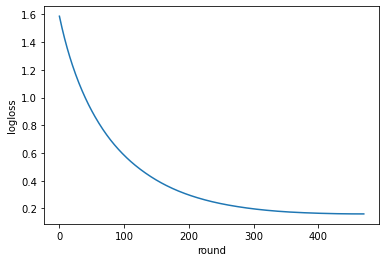

In [21]:

plt.xlabel('round')
plt.ylabel('logloss')
plt.plot(round_n, cv_logloss)
plt.show()

In [22]:
params.pop('early_stopping_rounds')
best_num_round = np.argmin(cv_logloss)
params['num_iteration'] = best_num_round
print(best_num_round)

470


In [23]:

gbm = lgb.train(params, lgb_train)

C:\Users\81806\anaconda3\envs\pyvino\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [24]:
path_model_file = os.path.join(path_save_dir, 'model.pkl')

In [25]:
pickle.dump(gbm, open(path_model_file, "wb"))

In [26]:

gbm = pickle.load(open(path_model_file, "rb"))

In [27]:

feature_name_list = gbm.feature_name()